In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerEnsemble
from src.backend.Logger import Logger


In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"classes_mode": True
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''


# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# site = 'MT'
site = 'PA'

if site == 'PA':
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2018, 2019, 2020]

elif site == 'MT':
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2019, 2020, 2021]


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:
		exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		# exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date

	if type(dataset) == MTMultipleDates:
		# exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140

logger = Logger()
trainer = TrainerEnsemble(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp_ids)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': True}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp_ids

[103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

In [7]:
trainer.classes_mode

True

In [8]:
# trainer.setExperimentPath()
# trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:
unique, count = np.unique(trainer.label_mask, return_counts=True)
print(unique, count)

total = np.sum(count)
percentage_count = [round(x*100, 1) for x in count / total]
print(percentage_count)

[0 1 2] [100903598   1838508  60373894]
[61.9, 1.1, 37.0]


In [14]:
# pdb.set_trace()

In [15]:

trainer.getLabelCurrentDeforestation()

In [16]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [17]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

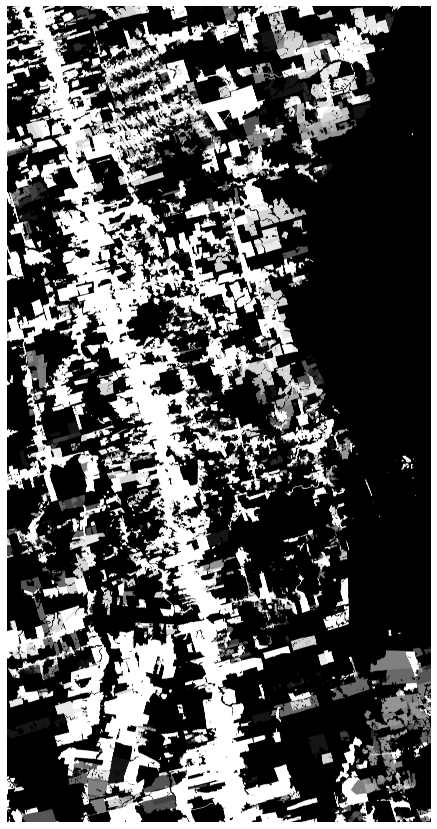

In [18]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [19]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [20]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [21]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [22]:
if config["training"] == True:
    trainer.extractCoords()

In [23]:
if config["training"] == True:
    trainer.trainTestSplit()

In [24]:
if config["training"] == True:
    trainer.label_mask.shape

In [25]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [26]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [27]:
if config["training"] == True:
    print(trainer.coords_train)

In [28]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [29]:
if config["training"] == True:
    inputSnipShow = True

In [30]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [31]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [32]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [33]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [34]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [35]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [36]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [37]:
if config["training"] == True:
    trainer.getGenerators()


In [38]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [39]:
if config["training"] == True:
    print(trainer.path_exp)

In [40]:
if config["training"] == True:
    print(trainer.channels)

In [41]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [42]:
if config["training"] == True:
    trainer.train()

In [43]:
if config["training"] == True:
    trainer.plotHistory()


In [44]:
trainer.image_stack.shape

(17730, 9200, 21)

In [45]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [46]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [47]:
trainer.image_stack.shape

(17730, 9200, 21)

In [48]:
trainer.setPadding()

-30.0 -16.0


In [49]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [50]:
trainer.loadPredictedProbabilities()

In [51]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [52]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [53]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [54]:
trainer.getMeanProb()


In [55]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 1.500655e-16
    np.mean(value): 0.014949512
    np.max(value): 0.9961816


In [56]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [57]:
trainer.unpadMeanProb()

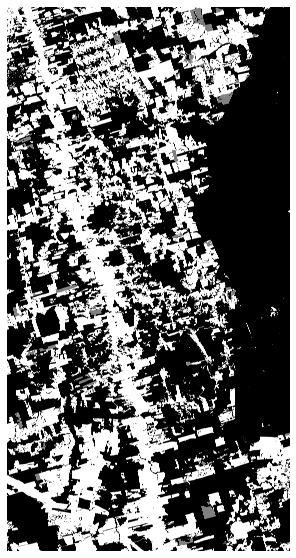

In [58]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [59]:
trainer.squeezeLabel()

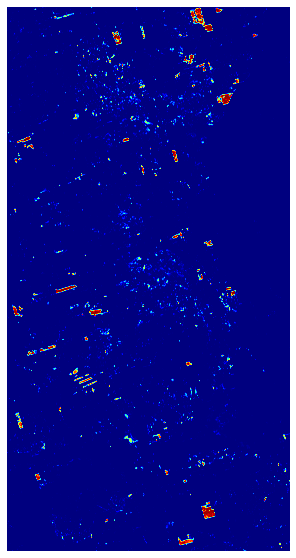

In [60]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [61]:
print(trainer.label_mask.shape)

(17730, 9200)


In [62]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [63]:
# trainer.getMAP()

In [64]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [65]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 2)


In [66]:
trainer.prob_rec.shape

(10, 17760, 9216, 2)

In [67]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 0.0, np.mean(value): 0.3151436, np.max(value): 1.0


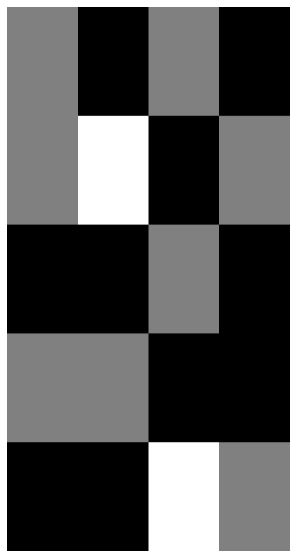

In [68]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [69]:
trainer.getLabelCurrentDeforestation()

In [70]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161192339,   1923661], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [71]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [72]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161192339,   1923661], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161368428,   1747572], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162939911,    176089], dtype=int64))


In [73]:
trainer.calculateMetrics()

ic| self.f1: 85.77, self.precision: 88.45, self.recall: 83.24


In [74]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9431485,)
ic| f1_val: 87.05
    precision_val: 84.03
    recall_val: 90.3
    mAP_val: 92.71


In [75]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [76]:
trainer.get_label_no_buffer()


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


In [77]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162560284,    555716], dtype=int64))


In [78]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


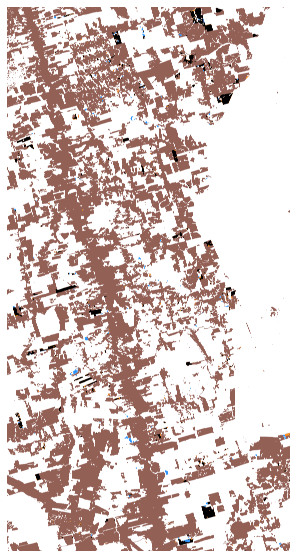

In [79]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [80]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [81]:
trainer.prob_rec.shape

(10, 17760, 9216, 2)

In [82]:
trainer.setUncertainty()

K shape 2, pred_mean shape (17760, 9216, 2)


In [83]:
trainer.uncertainty_map.shape

(17760, 9216)

In [84]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| np.min(value): 2.0689155e-05
    np.mean(value): 0.04151901
    np.max(value): 1.0614758


In [85]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.030627517
    np.max(value): 1.0614758


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

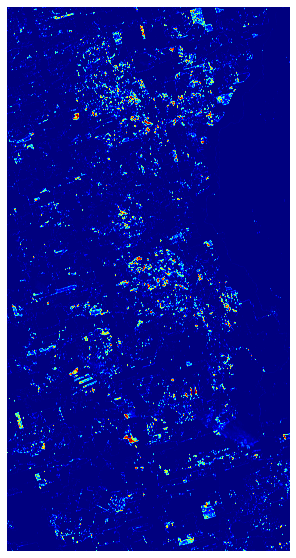

In [86]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



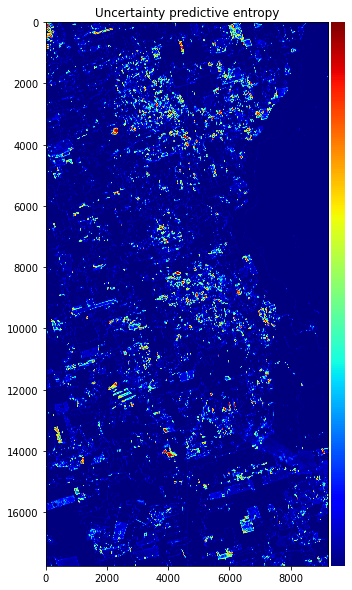

In [87]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [88]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54147114,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


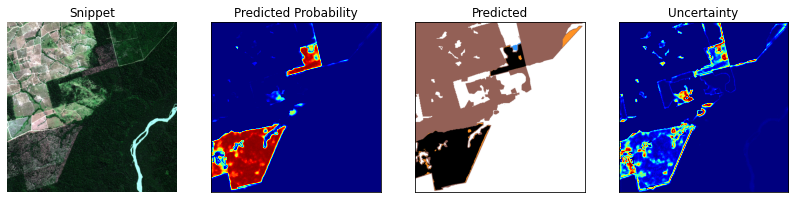

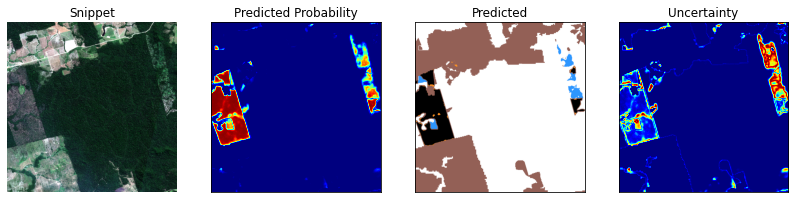

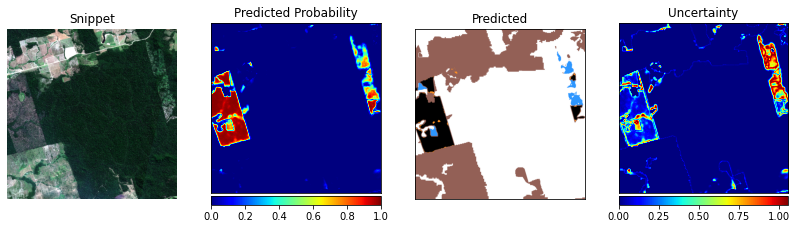

In [89]:
trainer.logger.plotCropSample(trainer)

In [90]:

label_tmp_dates = []
for date in dataset.prodes_dates:
    label_tmp_date = dataset.loadLabelFromDate(date)
    label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
    label_tmp_dates.append(label_tmp_date)

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2018) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


In [91]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([104050616,   2209014,  56856370], dtype=int64))

In [92]:
label_tmp_dates[0].shape

(17730, 9200)

In [93]:
# del trainer.image_stack
import src.lansdatLoader as ll
import importlib
importlib.reload(ll)
landsatLoader = ll.LandsatLoader(dataset)
ims = landsatLoader.load()
for idx in range(len(ims)):
    ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif


In [94]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1], dtype=uint8), array([160906986,   2209014], dtype=int64))

In [95]:
ims[0].shape

(17730, 9200, 3)

In [96]:
trainer.classes_mode

True

In [97]:
'''
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_figheight(20)
fig.set_figwidth(20)
lims = trainer.dataset.previewLims1
axes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)
'''

'\nfig, axes = plt.subplots(2, 3)\naxes = axes.flatten()\nfig.set_figheight(20)\nfig.set_figwidth(20)\nlims = trainer.dataset.previewLims1\naxes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)\n'

In [98]:
# trainer.dataset.previewLims2 = np.array([5000, 6000, 9500, 10500])

In [99]:
import src.backend.Logger as lg 
importlib.reload(lg)
logger = lg.Logger()


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


[(17730, 9200, 3), (17730, 9200, 3), (17730, 9200, 3), (17730, 9200), (17730, 9200, 3), (17730, 9200)]
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


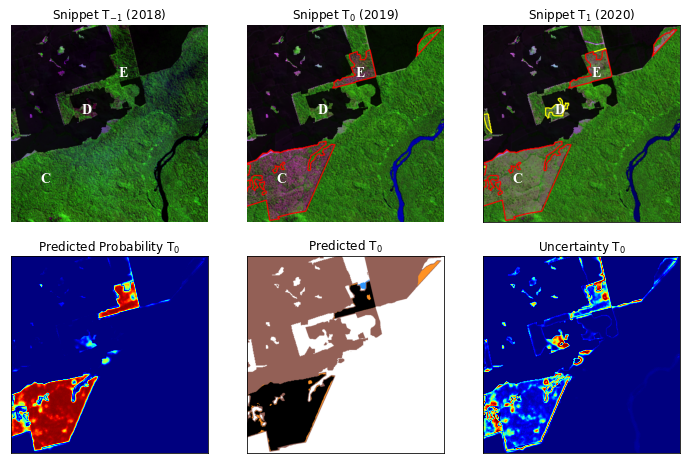

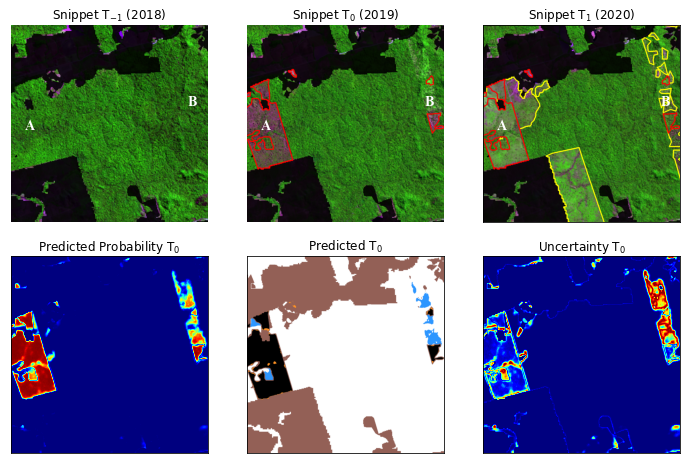

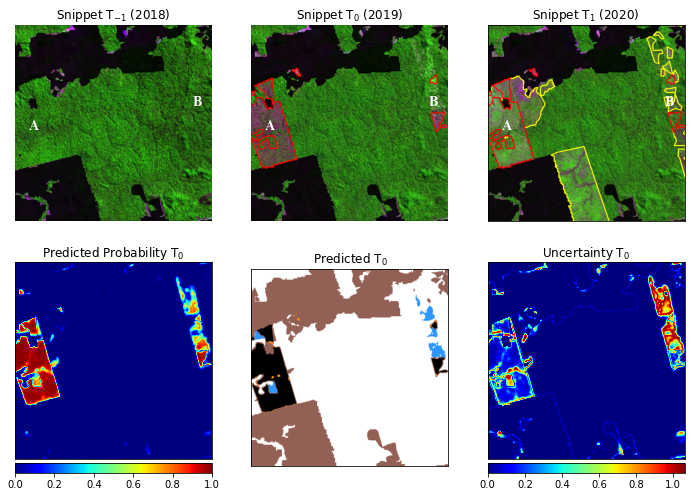

In [100]:
logger.plotCropSampleLandsat(trainer, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


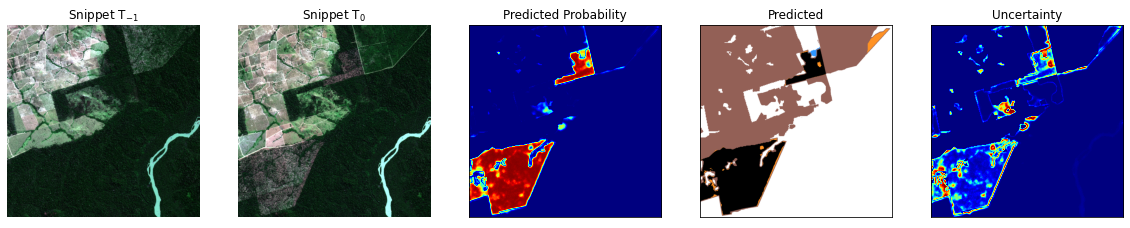

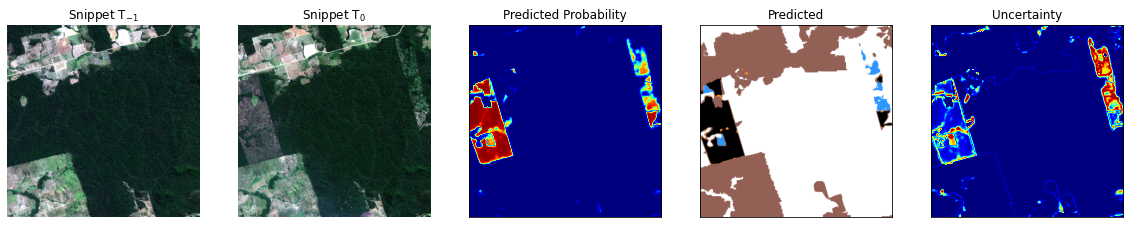

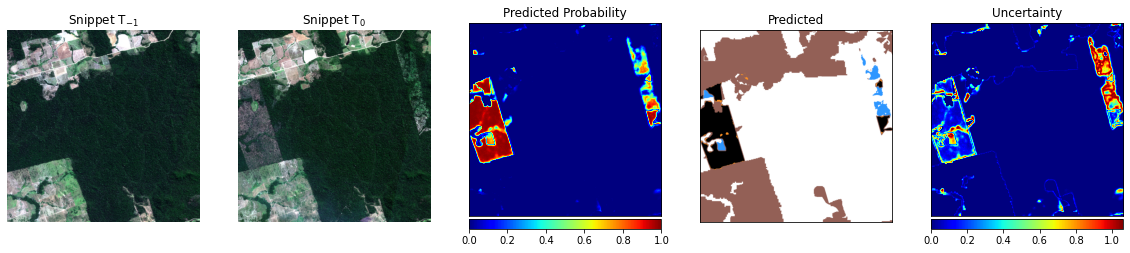

In [101]:
logger.plotCropSampleT0T1(trainer)

In [102]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [103]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [104]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 2.0689155e-05
    np.mean(value): 0.041848443
    np.max(value): 1.0614758


In [105]:
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  

(54147114,) (54147114,)
0.4330919503950512
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...
0.03274357484485723
0.4330919503950512
0.03274357484485723


In [106]:
trainer.uncertainty.shape

(54147114,)

In [107]:
np.mean(trainer.mean_prob)

0.01406089

In [108]:
trainer.prob_rec.shape

(10, 17760, 9216, 2)

(17730, 9200)
[[550, 115], [430, 950]]


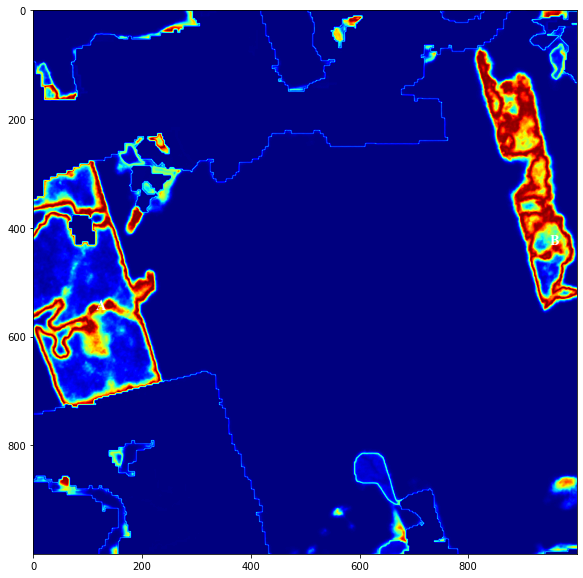

In [125]:
print(trainer.mean_prob.shape)

lims = dataset.previewLims2
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')
font = {'family': "Times New Roman",
        'color':  'white',
        'weight': 'bold',
        'size': 14,
        }

letters = ['A', 'B', 'C', 'D', 'E', 'F']
print(trainer.dataset.snippet_coords['snippet_id1'])
for poi_id in range(2):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                 letters[poi_id], fontdict=font)


In [111]:
'''
print(trainer.mean_prob.shape)

lims = dataset.previewLims1
im = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(15,15))
plt.imshow(im, cmap='jet')
'''

"\nprint(trainer.mean_prob.shape)\n\nlims = dataset.previewLims1\nim = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]\nplt.figure(figsize=(15,15))\nplt.imshow(im, cmap='jet')\n"

In [112]:
def getPOIValues(self):
    self.snippet_poi_results = []

    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]
    for snippet_id, lims in enumerate(lims_snippets):
        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:
            dict_ = {"snippet_id": snippet_id,
                    "coords": coord, # 10,1 alpha
                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}
            
            predicted_coord = []
            for idx in range(self.prob_rec.shape[0]):
                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])
            predicted_coord = np.array(predicted_coord)
            dict_["predicted"] = predicted_coord

            self.snippet_poi_results.append(dict_)

    return self.snippet_poi_results

In [113]:

import types

trainer.getPOIValues = types.MethodType(getPOIValues, trainer)



In [114]:
trainer.getPOIValues()


[{'snippet_id': 0,
  'coords': [550, 550],
  'reference': 0,
  'predicted': array([[9.99794543e-01, 2.48296004e-07],
         [9.99998212e-01, 4.16432844e-09],
         [9.99991417e-01, 1.68376213e-09],
         [9.99922633e-01, 2.36679583e-07],
         [9.99042690e-01, 3.45382723e-05],
         [9.99996185e-01, 3.84681698e-06],
         [9.99947429e-01, 1.00834685e-13],
         [9.99997377e-01, 1.32610875e-11],
         [9.99950409e-01, 1.66440691e-06],
         [9.99974847e-01, 8.39343954e-08]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [210, 610],
  'reference': 1,
  'predicted': array([[0.3362616 , 0.4554153 ],
         [0.30509266, 0.4598863 ],
         [0.4706195 , 0.30445483],
         [0.2797353 , 0.5327956 ],
         [0.3281333 , 0.46919134],
         [0.223871  , 0.5441637 ],
         [0.72242296, 0.150321  ],
         [0.3673512 , 0.36867702],
         [0.2587031 , 0.59043163],
         [0.35121685, 0.4161476 ]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [207,

In [115]:
import pickle
with open('log_ensemble_.pkl', 'wb') as f:
            pickle.dump(trainer.snippet_poi_results, f)


Get precision-recall threshold

In [116]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54147114,)
    self.label_mask_current_deforestation_test.shape: (54147114,)


[0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0584757537841798, 1.0599757537841796]
threshold 0.0025


ic| label_current_deforestation_test_classified_incorrect.shape: (12308603,)
    predicted_test_classified_incorrect.shape: (12308603,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:293: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 12308603
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 12308603
    len(label_mask_current_deforestation_test): 54147114


[       nan 0.         0.         0.2273178  0.884497   0.83594701
 0.01622548]
threshold 0.025


ic| label_current_deforestation_test_classified_incorrect.shape: (7191645,)
    predicted_test_classified_incorrect.shape: (7191645,)
ic| TP_H + FN_H + FP_H + TN_H: 7191645
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 7191645
    len(label_mask_current_deforestation_test): 54147114


[1.00000000e+00 1.14342180e-02 1.10318903e-04 1.32816774e-01
 8.84483457e-01 8.40437543e-01 2.72052474e-02]
threshold 0.05


ic| label_current_deforestation_test_classified_incorrect.shape: (5769613,)
    predicted_test_classified_incorrect.shape: (5769613,)
ic| TP_H + FN_H + FP_H + TN_H: 5769613
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 5769613
    len(label_mask_current_deforestation_test): 54147114


[1.         0.72492343 0.0309465  0.1065544  0.88056992 0.83723365
 0.03361269]
threshold 0.1


ic| label_current_deforestation_test_classified_incorrect.shape: (4585883,)
    predicted_test_classified_incorrect.shape: (4585883,)
ic| TP_H + FN_H + FP_H + TN_H: 4585883
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 4585883
    len(label_mask_current_deforestation_test): 54147114


[1.         0.92364546 0.17803292 0.08469303 0.85755029 0.81066152
 0.04177746]
threshold 0.2


ic| label_current_deforestation_test_classified_incorrect.shape: (3380473,)
    predicted_test_classified_incorrect.shape: (3380473,)
ic| TP_H + FN_H + FP_H + TN_H: 3380473
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 3380473
    len(label_mask_current_deforestation_test): 54147114


[0.99941892 0.94940705 0.35840024 0.06243127 0.81375112 0.76150719
 0.05557806]
threshold 0.4


ic| label_current_deforestation_test_classified_incorrect.shape: (2120381,)
    predicted_test_classified_incorrect.shape: (2120381,)
ic| TP_H + FN_H + FP_H + TN_H: 2120381
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2120381
    len(label_mask_current_deforestation_test): 54147114


[0.99321959 0.95182735 0.54405061 0.03915963 0.73310529 0.67315304
 0.08393501]
threshold 0.5


ic| label_current_deforestation_test_classified_incorrect.shape: (1658900,)
    predicted_test_classified_incorrect.shape: (1658900,)
ic| TP_H + FN_H + FP_H + TN_H: 1658900
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1658900
    len(label_mask_current_deforestation_test): 54147114


[0.988047   0.94946114 0.60377263 0.03063691 0.69278761 0.62805104
 0.10302039]
threshold 0.6


ic| label_current_deforestation_test_classified_incorrect.shape: (1291872,)
    predicted_test_classified_incorrect.shape: (1291872,)
ic| TP_H + FN_H + FP_H + TN_H: 1291872
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1291872
    len(label_mask_current_deforestation_test): 54147114


[0.98082363 0.94544247 0.65362861 0.02385856 0.65084448 0.57932523
 0.12473541]
threshold 0.7


ic| label_current_deforestation_test_classified_incorrect.shape: (1044661,)
    predicted_test_classified_incorrect.shape: (1044661,)
ic| TP_H + FN_H + FP_H + TN_H: 1044661
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1044661
    len(label_mask_current_deforestation_test): 54147114


[0.96885251 0.94070145 0.69871363 0.01929301 0.60793273 0.51984371
 0.14084407]
threshold 0.8


ic| label_current_deforestation_test_classified_incorrect.shape: (820761,)
    predicted_test_classified_incorrect.shape: (820761,)
ic| TP_H + FN_H + FP_H + TN_H: 820761
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 820761
    len(label_mask_current_deforestation_test): 54147114


[0.95214875 0.9343146  0.74038421 0.01515798 0.56285131 0.44350103
 0.15492063]
threshold 0.9


ic| label_current_deforestation_test_classified_incorrect.shape: (606923,)
    predicted_test_classified_incorrect.shape: (606923,)
ic| TP_H + FN_H + FP_H + TN_H: 606923
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 606923
    len(label_mask_current_deforestation_test): 54147114


[0.93063347 0.92460993 0.78037413 0.01120878 0.5074401  0.33375823
 0.16287355]
threshold 1.0584757537841798


ic| label_current_deforestation_test_classified_incorrect.shape: (23528,)
    predicted_test_classified_incorrect.shape: (23528,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 23528
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 23528
    len(label_mask_current_deforestation_test): 54147114


[8.84496998e-01 8.39372674e-01 8.32439205e-01 4.34519927e-04
            nan 0.00000000e+00 2.75297653e-02]
threshold 1.0599757537841796


ic| label_current_deforestation_test_classified_incorrect.shape: (9405,)
    predicted_test_classified_incorrect.shape: (9405,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 9405
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 9405
    len(label_mask_current_deforestation_test): 54147114


[8.84496998e-01 8.35364320e-01 8.32439205e-01 1.73693468e-04
            nan 0.00000000e+00 1.22616584e-02]


In [117]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54147114,)
    self.label_mask_current_deforestation_test.shape: (54147114,)


threshold 0.0025
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    3081   731154]]
[1.        0.9958038]
threshold 0.025
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    7003   727232]]
[1.         0.99046218]
threshold 0.05
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [    8622   725613]]
[1.         0.98825717]
threshold 0.1
(54147114,) (54147114,)
cm_audited [[53412879        0]
 [   10806   723429]]
[1.         0.98528264]
threshold 0.2
(54147114,) (54147114,)
cm_audited [[53412726      153]
 [   14023   720212]]
[0.99978761 0.98090121]
threshold 0.4
(54147114,) (54147114,)
cm_audited [[53410152     2727]
 [   20217   714018]]
[0.9961953  0.97246522]
threshold 0.5
(54147114,) (54147114,)
cm_audited [[53407516     5363]
 [   23597   710638]]
[0.99250979 0.96786179]
threshold 0.6
(54147114,) (54147114,)
cm_audited [[53403496     9383]
 [   27694   706541]]
[0.98689386 0.96228183]
threshold 0.7
(54147114,) (54147114,)
cm_audited [[53396386    16493

ic| metric_values_audited: array([[1.        , 0.9958038 ],
                                  [1.        , 0.99046218],
                                  [1.        , 0.98825717],
                                  [1.        , 0.98528264],
                                  [0.99978761, 0.98090121],
                                  [0.9961953 , 0.97246522],
                                  [0.99250979, 0.96786179],
                                  [0.98689386, 0.96228183],
                                  [0.97704169, 0.95595552],
                                  [0.96223061, 0.94794855],
                                  [0.94151384, 0.93637051],
                                  [0.88550193, 0.8406995 ],
                                  [0.88492514, 0.83594081]])


cm_audited [[53333064    79815]
 [  120458   613777]]
[0.88492514 0.83594081]


In [118]:
trainer.setPlotLimsForUncertaintyAA()

In [119]:
'''
import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
'''


'\nimport types\n\ntrainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)\n'

In [120]:
trainer.xlim


[-0.1, 10.4]

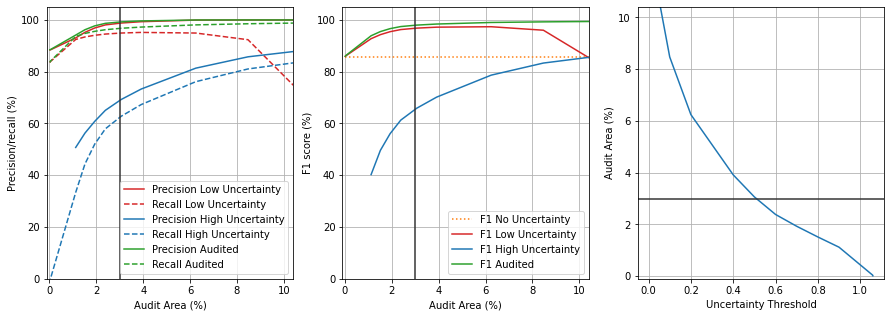

In [121]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

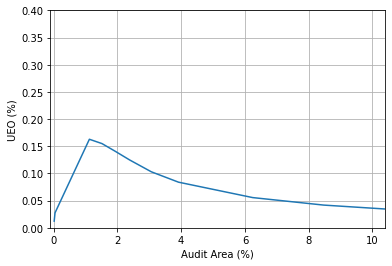

In [122]:
trainer.plotUEO()

In [123]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 1.0599757537841796)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.4058017616778914
threshold 0.4058017616778914


ic| label_current_deforestation_test_classified_incorrect.shape: (2092950,)
    predicted_test_classified_incorrect.shape: (2092950,)
ic| TP_H + FN_H + FP_H + TN_H: 2092950
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2092950
    len(label_mask_current_deforestation_test): 54147114


[0.99296783 0.95174432 0.54790224 0.03865303 0.73077798 0.67057509
 0.08486832]
0.6556739921062881
threshold 0.6556739921062881


ic| label_current_deforestation_test_classified_incorrect.shape: (1150860,)
    predicted_test_classified_incorrect.shape: (1150860,)
ic| TP_H + FN_H + FP_H + TN_H: 1150860
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1150860
    len(label_mask_current_deforestation_test): 54147114


[0.97449592 0.94294002 0.67917084 0.02125432 0.62763875 0.54791419
 0.13367284]
0.2513722304283966
threshold 0.2513722304283966


ic| label_current_deforestation_test_classified_incorrect.shape: (2966484,)
    predicted_test_classified_incorrect.shape: (2966484,)
ic| TP_H + FN_H + FP_H + TN_H: 2966484
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 2966484
    len(label_mask_current_deforestation_test): 54147114


[0.99843654 0.95158582 0.4183538  0.05478563 0.79306153 0.73896125
 0.06260827]
0.5300228874127318
threshold 0.5300228874127318


ic| label_current_deforestation_test_classified_incorrect.shape: (1504213,)
    predicted_test_classified_incorrect.shape: (1504213,)
ic| TP_H + FN_H + FP_H + TN_H: 1504213
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1504213
    len(label_mask_current_deforestation_test): 54147114


[0.98612424 0.9484526  0.61937254 0.02778011 0.68060142 0.61408653
 0.11185167]
0.5302912477761078
threshold 0.5302912477761078


ic| label_current_deforestation_test_classified_incorrect.shape: (1501770,)
    predicted_test_classified_incorrect.shape: (1501770,)
ic| TP_H + FN_H + FP_H + TN_H: 1501770
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1501770
    len(label_mask_current_deforestation_test): 54147114


[0.98610825 0.94844443 0.61951964 0.027735   0.68047793 0.61394697
 0.11201615]
0.48257056368768875
threshold 0.48257056368768875


ic| label_current_deforestation_test_classified_incorrect.shape: (1739714,)
    predicted_test_classified_incorrect.shape: (1739714,)
ic| TP_H + FN_H + FP_H + TN_H: 1739714
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1739714
    len(label_mask_current_deforestation_test): 54147114


[0.98901109 0.9499926  0.59425661 0.03212939 0.69995077 0.63606638
 0.09902406]
0.4532474905955574
threshold 0.4532474905955574


ic| label_current_deforestation_test_classified_incorrect.shape: (1874024,)
    predicted_test_classified_incorrect.shape: (1874024,)
ic| TP_H + FN_H + FP_H + TN_H: 1874024
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1874024
    len(label_mask_current_deforestation_test): 54147114


[0.99066932 0.95072041 0.57740369 0.03460986 0.7117889  0.64949533
 0.09309302]
0.5060229780013847
threshold 0.5060229780013847


ic| label_current_deforestation_test_classified_incorrect.shape: (1630324,)
    predicted_test_classified_incorrect.shape: (1630324,)
ic| TP_H + FN_H + FP_H + TN_H: 1630324
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1630324
    len(label_mask_current_deforestation_test): 54147114


[0.98768658 0.94924875 0.60697052 0.03010916 0.69033719 0.62529792
 0.10451303]
0.5060563188402517
threshold 0.5060563188402517


ic| label_current_deforestation_test_classified_incorrect.shape: (1630173,)
    predicted_test_classified_incorrect.shape: (1630173,)
ic| TP_H + FN_H + FP_H + TN_H: 1630173
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1630173
    len(label_mask_current_deforestation_test): 54147114


[0.98768685 0.94924781 0.60698414 0.03010637 0.69032428 0.62528613
 0.10452187]
0.515210733441234
threshold 0.515210733441234


ic| label_current_deforestation_test_classified_incorrect.shape: (1586082,)
    predicted_test_classified_incorrect.shape: (1586082,)
ic| TP_H + FN_H + FP_H + TN_H: 1586082
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1586082
    len(label_mask_current_deforestation_test): 54147114


[0.98711065 0.94891041 0.61174147 0.02929209 0.68664458 0.62112001
 0.10691962]
0.5086123590161331
threshold 0.5086123590161331


ic| label_current_deforestation_test_classified_incorrect.shape: (1618079,)
    predicted_test_classified_incorrect.shape: (1618079,)
ic| TP_H + FN_H + FP_H + TN_H: 1618079
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1618079
    len(label_mask_current_deforestation_test): 54147114


[0.98753878 0.94915157 0.60831614 0.02988301 0.689287   0.62413335
 0.10516841]
0.507273090138212
threshold 0.507273090138212


ic| label_current_deforestation_test_classified_incorrect.shape: (1624508,)
    predicted_test_classified_incorrect.shape: (1624508,)
ic| TP_H + FN_H + FP_H + TN_H: 1624508
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624508
    len(label_mask_current_deforestation_test): 54147114


[0.98761852 0.94921681 0.607612   0.03000175 0.68983443 0.62472704
 0.10482845]
0.507784645329503
threshold 0.507784645329503


ic| label_current_deforestation_test_classified_incorrect.shape: (1622061,)
    predicted_test_classified_incorrect.shape: (1622061,)
ic| TP_H + FN_H + FP_H + TN_H: 1622061
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1622061
    len(label_mask_current_deforestation_test): 54147114


[0.98757332 0.94920852 0.60786397 0.02995656 0.6896608  0.62449723
 0.10495901]
0.5071083194360331
threshold 0.5071083194360331


ic| label_current_deforestation_test_classified_incorrect.shape: (1625207,)
    predicted_test_classified_incorrect.shape: (1625207,)
ic| TP_H + FN_H + FP_H + TN_H: 1625207
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1625207
    len(label_mask_current_deforestation_test): 54147114


[0.987628   0.94921714 0.60753982 0.03001466 0.6898887  0.62479521
 0.1047895 ]
0.5073564378297486
threshold 0.5073564378297486


ic| label_current_deforestation_test_classified_incorrect.shape: (1624110,)
    predicted_test_classified_incorrect.shape: (1624110,)
ic| TP_H + FN_H + FP_H + TN_H: 1624110
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624110
    len(label_mask_current_deforestation_test): 54147114


[0.98760825 0.94921536 0.60764469 0.0299944  0.68981774 0.62469768
 0.104849  ]
0.5072397492808028
threshold 0.5072397492808028


ic| label_current_deforestation_test_classified_incorrect.shape: (1624648,)
    predicted_test_classified_incorrect.shape: (1624648,)
ic| TP_H + FN_H + FP_H + TN_H: 1624648
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624648
    len(label_mask_current_deforestation_test): 54147114


[0.98762049 0.94921998 0.60760111 0.03000433 0.68984192 0.62473368
 0.10482158]
0.5073064309956211
threshold 0.5073064309956211


ic| label_current_deforestation_test_classified_incorrect.shape: (1624349,)
    predicted_test_classified_incorrect.shape: (1624349,)
ic| TP_H + FN_H + FP_H + TN_H: 1624349
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624349
    len(label_mask_current_deforestation_test): 54147114
ic| self.threshold_optimal: 0.5073064309956211


[0.98761223 0.94921385 0.60762562 0.02999881 0.68983012 0.62471757
 0.10483518]


In [124]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.5073064309956211


ic| label_current_deforestation_test_classified_incorrect.shape: (1624349,)
    predicted_test_classified_incorrect.shape: (1624349,)
ic| TP_H + FN_H + FP_H + TN_H: 1624349
    len(label_mask_current_deforestation_test): 54147114
ic| TP_H + FN_H + FP_H + TN_H: 1624349
    len(label_mask_current_deforestation_test): 54147114


[0.98761223 0.94921385 0.60762562 0.02999881 0.68983012 0.62471757
 0.10483518]
threshold 0.5073064309956211
(54147114,) (54147114,)


ic| self.m_optimal: {'AA': array([0.02999881]),
                     'UEO': array([0.10483518]),
                     'f1': 85.77,
                     'f1_H': array([0.65566126]),
                     'f1_L': array([0.96803241]),
                     'precision_H': array([0.68983012]),
                     'precision_L': array([0.98761223]),
                     'recall_H': array([0.62471757]),
                     'recall_L': array([0.94921385]),
                     'recall_Ltotal': array([0.60762562])}
ic| self.m_audited_optimal: {'f1': array([0.97968137]),
                             'precision': array([0.99218393]),
                             'recall': array([0.96748997])}


cm_audited [[53407283     5596]
 [   23870   710365]]
[0.99218393 0.96748997]


{'metrics': {'precision_L': array([0.98761223]),
  'recall_L': array([0.94921385]),
  'recall_Ltotal': array([0.60762562]),
  'AA': array([0.02999881]),
  'precision_H': array([0.68983012]),
  'recall_H': array([0.62471757]),
  'UEO': array([0.10483518]),
  'f1_L': array([0.96803241]),
  'f1_H': array([0.65566126]),
  'f1': 85.77},
 'metrics_audited': {'precision': array([0.99218393]),
  'recall': array([0.96748997]),
  'f1': array([0.97968137])},
 'exp': 103}